In [485]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.api import VAR
from statsmodels.tsa.statespace.varmax import VARMAX
from scipy.stats import norm
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, median_absolute_error

In [486]:
# Laste poll-of-polls data
df = pd.read_csv("../data/v2_data_august.csv", sep=",")

In [487]:
df["Mnd"] = pd.to_datetime(df["Mnd"])

In [488]:
# Sort values and set index
df = df.sort_values("Mnd")
df.set_index("Mnd", inplace=True)

In [489]:
df=df.dropna()

In [490]:
df

,Ap,Hoyre,Frp,SV,SP,KrF,Venstre,MDG,Rodt,Andre,...,Rodt_reg_lag3,Rodt_reg_lag6,Andre_reg_lag3,Andre_reg_lag6,ledighet,ledig_trend3,ledig_trend6,styringsrente,styringsrente_trend3,styringsrente_trend6
Mnd,,,,,,,,,,,,,,,,,,,,,
2008-06-30,26.0,17.6,28.9,6.9,5.3,6.1,5.9,0.0,1.8,0.0,...,0.0,0.0,0.0,0.0,2.9,0.067,0.050000,5.54,0.076667,0.048333
2008-07-31,26.9,17.2,30.2,6.6,4.7,6.1,5.4,0.0,1.9,0.0,...,0.0,0.0,0.0,0.0,2.9,0.033,0.050000,5.75,0.083333,0.083333
2008-08-31,26.6,16.2,30.9,6.7,5.2,5.5,6.0,0.0,1.7,0.0,...,0.0,0.0,0.0,0.0,3.0,0.033,0.066667,5.75,0.070000,0.083333
2008-09-30,28.9,15.2,29.9,6.3,5.0,5.7,5.9,0.0,1.5,0.0,...,0.0,0.0,0.0,0.0,3.1,0.067,0.066667,5.75,0.000000,0.073333
2008-10-31,30.6,16.1,26.7,7.3,5.3,5.6,5.5,0.0,1.2,0.0,...,0.0,0.0,0.0,0.0,3.1,0.033,0.050000,5.45,-0.100000,-0.008333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-04-30,28.1,19.8,20.0,6.3,6.7,3.3,3.9,3.1,4.8,3.9,...,0.0,0.0,0.0,0.0,4.0,-0.033,-0.016667,4.50,0.000000,0.000000
2025-05-31,28.5,18.7,20.6,7.0,5.7,3.6,4.1,2.7,5.3,3.8,...,0.0,0.0,0.0,0.0,4.0,0.000,-0.016667,4.50,0.000000,0.000000
2025-06-30,28.3,16.2,21.0,6.9,5.6,3.7,4.5,3.0,6.2,4.5,...,0.0,0.0,0.0,0.0,4.0,0.000,-0.016667,4.50,0.000000,0.000000


In [491]:
parties=['Ap', 'Hoyre', 'Frp', 'SV', 'SP', 'KrF', 'Venstre', 'MDG','Rodt', 'Andre']
predictions=[]

In [492]:
external= ['Ap_skandale_lag6', 'Hoyre_skandale_lag6', 'Frp_skandale_lag6',
       'SV_skandale_lag6', 'SP_skandale_lag6', 'KrF_skandale_lag6',
        'Rodt_skandale_lag6',
        'Ap_reg_lag6',
        'Hoyre_reg_lag6', 
        'Frp_reg_lag6','SV_reg_lag6', 
        'SP_reg_lag6','KrF_reg_lag6',
        'Venstre_reg_lag6', 
       'ledighet', 'ledig_trend3', 'ledig_trend6', 'styringsrente',
       'styringsrente_trend3', 'styringsrente_trend6']

In [493]:
X=df[external]

In [494]:
X_future=df[external].iloc[-1]

In [495]:
X_future

Ap_skandale_lag6        0.000000
Hoyre_skandale_lag6     0.000000
Frp_skandale_lag6       0.000000
SV_skandale_lag6        0.000000
SP_skandale_lag6        0.000000
KrF_skandale_lag6       0.000000
Rodt_skandale_lag6      0.000000
Ap_reg_lag6             6.000000
Hoyre_reg_lag6          0.000000
Frp_reg_lag6            0.000000
SV_reg_lag6             0.000000
SP_reg_lag6             0.000000
KrF_reg_lag6            0.000000
Venstre_reg_lag6        0.000000
ledighet                4.000000
ledig_trend3            0.000000
ledig_trend6            0.000000
styringsrente           4.250000
styringsrente_trend3   -0.083333
styringsrente_trend6   -0.041667
Name: 2025-08-31 00:00:00, dtype: float64

In [496]:
reg_pred=[]

In [497]:
for party in parties:
    y=df[[party]]  
    x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=42
    )
    pipeline = Pipeline([
    ("feature_selection", SelectFromModel(RandomForestRegressor(n_estimators=10, random_state=42), threshold="median")),
    ("regressor", RandomForestRegressor(n_estimators=10, random_state=42))
    ])
    pipeline.fit(x_train, y_train.values.ravel())
    y_pred = pipeline.predict(x_test)
    r2 = r2_score(y_test, y_pred)
    predict_elect = pipeline.predict(X_future.to_frame().T)
    reg_pred.append(float(predict_elect[0]))
    print({
    'party': party,
    'r2_score': r2,
    'prediction': float(predict_elect[0])
    })
    

{'party': 'Ap', 'r2_score': 0.9394466657179404, 'prediction': 27.619999999999997}
{'party': 'Hoyre', 'r2_score': 0.6606286115569822, 'prediction': 16.869999999999997}
{'party': 'Frp', 'r2_score': 0.9340219247473379, 'prediction': 19.849999999999998}
{'party': 'SV', 'r2_score': 0.8223419969265611, 'prediction': 6.45}
{'party': 'SP', 'r2_score': 0.9412215269724982, 'prediction': 6.1800000000000015}
{'party': 'KrF', 'r2_score': 0.7433957958517736, 'prediction': 4.119999999999999}
{'party': 'Venstre', 'r2_score': 0.8460329533338802, 'prediction': 4.540000000000001}
{'party': 'MDG', 'r2_score': 0.9453767775920908, 'prediction': 3.6399999999999997}
{'party': 'Rodt', 'r2_score': 0.9149000907620507, 'prediction': 5.952}
{'party': 'Andre', 'r2_score': 0.900963124140874, 'prediction': 4.7700000000000005}


In [498]:
varmodel = VAR(endog=df[parties])

C:\Users\jens.nilsen\python\WPy64-31230\python-3.12.3.amd64\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


In [499]:
model_fitted = varmodel.fit(maxlags=3,method = 'ols', trend='n', verbose=True)
print(model_fitted.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Fri, 22, Aug, 2025
Time:                     10:39:36
--------------------------------------------------------------------
No. of Equations:         10.0000    BIC:                   -8.44417
Nobs:                     204.000    HQIC:                  -11.3499
Log likelihood:          -1235.61    FPE:                1.67069e-06
AIC:                     -13.3238    Det(Omega_mle):     4.23682e-07
--------------------------------------------------------------------
Results for equation Ap
                coefficient       std. error           t-stat            prob
-----------------------------------------------------------------------------
L1.Ap             -0.393689         0.388812           -1.013           0.311
L1.Hoyre          -1.322718         0.389265           -3.398           0.001
L1.Frp            -1.319218         0.387355           -3.406           0.0

In [500]:
# Compute R² for each party
r2_scores = {}
for party in ['Ap', 'Hoyre', 'Frp', 'SV', 'SP', 'KrF', 'Venstre', 'MDG', 'Rodt','Andre']:
    r2_scores[party] = r2_score(df[party].iloc[model_fitted.k_ar:], model_fitted.fittedvalues[party])

# Print R² values
for party, r2 in r2_scores.items():
    print(f"R² for {party}: {r2:.4f}")

R² for Ap: 0.9546
R² for Hoyre: 0.9333
R² for Frp: 0.9487
R² for SV: 0.9517
R² for SP: 0.9570
R² for KrF: 0.8845
R² for Venstre: 0.8067
R² for MDG: 0.9698
R² for Rodt: 0.9607
R² for Andre: 0.9498


In [501]:
print("Is the VAR model stable?", model_fitted.is_stable())

Is the VAR model stable? True


In [502]:
steps = 1  # Number of steps to forecast
alpha = 0.1

forecast, lower, upper = model_fitted.forecast_interval(df[parties].values[-model_fitted.k_ar:], steps=steps, alpha=alpha)


In [503]:
forecast

array([[26.58263792, 16.0572574 , 21.58549637,  7.20813405,  6.22659948,
         3.51587975,  4.4522122 ,  3.94639008,  6.04492043,  4.39147549]])

In [504]:
reg_pred

[27.619999999999997,
 16.869999999999997,
 19.849999999999998,
 6.45,
 6.1800000000000015,
 4.119999999999999,
 4.540000000000001,
 3.6399999999999997,
 5.952,
 4.7700000000000005]

In [505]:
avg_pred = (reg_pred + forecast[0]) / 2

# Normalize to sum 100
normalized_pred = avg_pred / avg_pred.sum() * 100

print(normalized_pred)
print("Sum:", normalized_pred.sum())

[27.10091202 16.46338149 20.71743709  6.82896448  6.20320659  3.81788255
  4.49603859  3.79313808  5.99837014  4.58066896]
Sum: 100.00000000000001


In [506]:
X

,Ap_skandale_lag6,Hoyre_skandale_lag6,Frp_skandale_lag6,SV_skandale_lag6,SP_skandale_lag6,KrF_skandale_lag6,Rodt_skandale_lag6,Ap_reg_lag6,Hoyre_reg_lag6,Frp_reg_lag6,SV_reg_lag6,SP_reg_lag6,KrF_reg_lag6,Venstre_reg_lag6,ledighet,ledig_trend3,ledig_trend6,styringsrente,styringsrente_trend3,styringsrente_trend6
Mnd,,,,,,,,,,,,,,,,,,,,
2008-06-30,1.0,0.0,0.0,0.0,1.0,0.0,0.0,6.0,0.0,0.0,6.0,6.0,0.0,0.0,2.9,0.067,0.050000,5.54,0.076667,0.048333
2008-07-31,1.0,0.0,0.0,0.0,1.0,0.0,0.0,6.0,0.0,0.0,6.0,6.0,0.0,0.0,2.9,0.033,0.050000,5.75,0.083333,0.083333
2008-08-31,0.0,0.0,0.0,0.0,1.0,0.0,0.0,6.0,0.0,0.0,6.0,6.0,0.0,0.0,3.0,0.033,0.066667,5.75,0.070000,0.083333
2008-09-30,0.0,0.0,0.0,0.0,1.0,0.0,0.0,6.0,0.0,0.0,6.0,6.0,0.0,0.0,3.1,0.067,0.066667,5.75,0.000000,0.073333
2008-10-31,1.0,0.0,0.0,0.0,1.0,0.0,0.0,6.0,0.0,0.0,6.0,6.0,0.0,0.0,3.1,0.033,0.050000,5.45,-0.100000,-0.008333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-04-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,2.0,0.0,0.0,4.0,-0.033,-0.016667,4.50,0.000000,0.000000
2025-05-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,1.0,0.0,0.0,4.0,0.000,-0.016667,4.50,0.000000,0.000000
2025-06-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.000,-0.016667,4.50,0.000000,0.000000


In [518]:
cutoffs = pd.date_range(
    start="2021-03-31",   # first end-of-month
    end="2021-08-31",     # last end-of-month
    freq="ME"              # month-end
).to_list()

In [508]:
###resultat valg 2021
valg = {
    "Ap": [26.3],
    "Høyre": [20.4],
    "Frp": [11.6],
    "SV": [7.6],
    "Sp": [13.5],
    "KrF": [3.8],
    "Venstre": [4.6],
    "MDG": [3.9],
    "Rødt": [4.7],
    "Andre": [3.6],
}

In [519]:
cutoffs

[Timestamp('2021-03-31 00:00:00'),
 Timestamp('2021-04-30 00:00:00'),
 Timestamp('2021-05-31 00:00:00'),
 Timestamp('2021-06-30 00:00:00'),
 Timestamp('2021-07-31 00:00:00'),
 Timestamp('2021-08-31 00:00:00')]

In [531]:
results=[]
reg_pred=[]
avg_pred=[]
normalized_pred=[]
reg_pred=[]

for i, cutoff in enumerate(cutoffs):
    X_c=df[parties].loc[df.index <= cutoff]
    X_e= df[external].loc[df.index <= cutoff]
    X_future=df[external].loc[df.index == pd.to_datetime('2021-09-30')]
    #print(X_future)
    varmodel = VAR(endog=X_c)
    model_fitted = varmodel.fit(maxlags=3,method = 'ols', trend='n', verbose=False)
    steps=len(cutoffs)-i
    forecast = model_fitted.forecast(X_c.values[-model_fitted.k_ar:], steps=steps)[-1]
    #print(forecast)
    last_actual_value = X_c.iloc[-1]  # Last known actual data point
    for party in parties:
        y=X_c[[party]]  
        pipeline = Pipeline([
            ("feature_selection", SelectFromModel(RandomForestRegressor(n_estimators=10, random_state=42), threshold="median")),
            ("regressor", RandomForestRegressor(n_estimators=100, random_state=42))
            ])
        pipeline.fit(X_e, X_c[party])
        predict_elect = pipeline.predict(X_future)
        #print(predict_elect)
        reg_pred.append(float(predict_elect[0]))
    #print(reg_pred)
    #print(forecast)
    avg_pred = (np.array(reg_pred) + forecast) / 2
    avg_pred= np.array(reg_pred)
    normalized_pred = avg_pred / avg_pred.sum() * 100
    print(avg_pred)
    #print(forecast)
    #print(normalized_pred)
    
    valg_values = np.array([v[0] for v in valg.values()])
    #print(valg_values)
    mse = mean_squared_error(normalized_pred, valg_values)
    mse_pp = mean_squared_error(last_actual_value.values, valg_values)
    results.append([cutoff, mse, mse_pp])
    reg_pred=[]
    avg_pred=[]
    normalized_pred=[]
    reg_pred=[]

C:\Users\jens.nilsen\python\WPy64-31230\python-3.12.3.amd64\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


[27.544      24.80066667 10.029       7.3262     18.268       3.499
  3.05693333  4.34135     4.03406667  2.79      ]


C:\Users\jens.nilsen\python\WPy64-31230\python-3.12.3.amd64\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


[27.519      24.92923333 10.348       7.3276     18.224       3.523
  3.08563333  4.3641      4.09        2.806     ]


C:\Users\jens.nilsen\python\WPy64-31230\python-3.12.3.amd64\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


[27.577      24.72433333 10.374       7.34386667 18.355       3.488
  3.066       4.278       3.9865      2.785     ]


C:\Users\jens.nilsen\python\WPy64-31230\python-3.12.3.amd64\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


[27.539      24.67023333 10.732       7.30593333 18.249       3.519
  3.10413333  4.3311      4.069       2.718     ]


C:\Users\jens.nilsen\python\WPy64-31230\python-3.12.3.amd64\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


[27.594      24.43523333 11.74        7.31666667 17.569       3.384
  3.16533333  4.48425     4.80933333  3.322     ]


C:\Users\jens.nilsen\python\WPy64-31230\python-3.12.3.amd64\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


[27.624      24.02856667 11.777       7.98566667 15.961       3.441
  3.358       4.994       5.055       3.853     ]


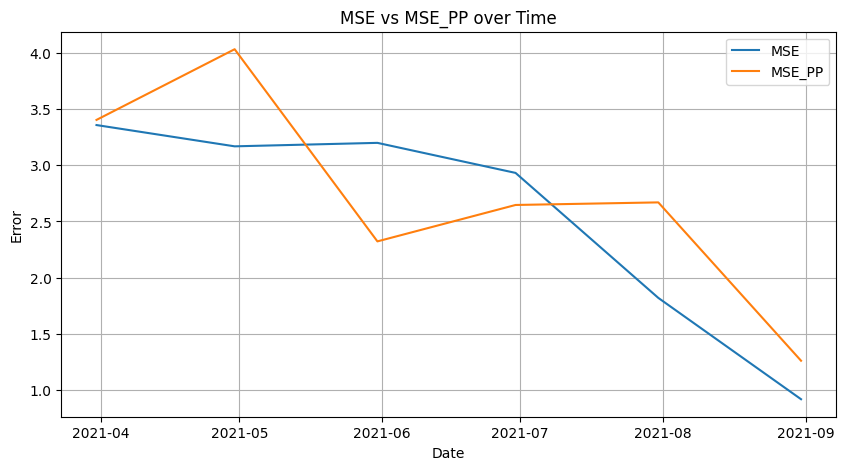

In [532]:
# Create DataFrame
df_plot = pd.DataFrame(results, columns=['Date', 'MSE', 'MSE_PP'])

# Plot
plt.figure(figsize=(10, 5))
plt.plot(df_plot['Date'], df_plot['MSE'], label='MSE')
plt.plot(df_plot['Date'], df_plot['MSE_PP'], label='MSE_PP')

plt.xlabel('Date')
plt.ylabel('Error')
plt.title('MSE vs MSE_PP over Time')
plt.legend()
plt.grid(True)
plt.show()